<center>
    <img src="https://www.dates-concours.ma/wp-content/uploads/2019/05/ENSET-Mohemmedia-300x141.png" width="300" alt="ENSET logo"  />
</center>

# Machine Learning – Decision Trees  workshop N°1
### By Hamza El Anssari 


## Objectives

After completing this lab you will be able to:

-   Build a Decision Tree Model
-   Use Cross Entropy

<h2>Table of content</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ul>
    <li><a>Packages</a></li>
    <li><a>Exercice 1 : Concepts de base</a></li>
    <li><a>Exercice 2 : trouver un arbre de décision à partir d’un dataset</a></li>
    <li><a>Exercice 3 : Implémentation & problèmes liés aux variables catégorielles (un peu de recherche…)</a></li>
    <li><a>Exercice 4 : Implémentation basée sur sklearn</a></li>
</ul>
    
</div>
 
<hr>

### <font color='red'>1 - Packages</font> ###
First, let's run the cell below to import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [sklearn](http://scikit-learn.org/stable/) provides simple and efficient tools for data mining and data analysis. 
- [matplotlib](http://matplotlib.org) is a library for plotting graphs in Python.
- [seaborn](http://seaborn.pydata.org/) is a library that uses Matplotlib underneath to plot graphs. 
- [pandas](http://pandas.pydata.org/) is a library for data analysis and manipulation.

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sn

### <font color='red'>2 - Exercice 1 : Concepts de base</font> ##

**1 - Donner une brève description à un arbre de décision :**<br>
<br>Decision Tree Classifier est l’un des algorithmes les plus populaires<br>
    ▪ Simple à Comprendre et à interpreter.<br>
    ▪ l’arbre de décision a une forme d’organigramme (flowchart): simple à comprendre et à interpréter.<br>
    ▪ Cette forme est simple à utiliser pour la prise décision.<br>
    ▪ Decision tree peut être utilisé pour faire la regression et pour faire la classification.<br>
    ▪ Si un attribut crucial n’est pas représenté on ne pourra pas trouver d’arbre de décision qui apprenne les exemples
    correctement..<br>
    ▪ Le cheminement d’un individu dans l’arbre permet de le classer et d’aboutir à une décision.<br>
<br>Decision Tree est un algorithm ML de type boite blanche.<br>
    ▪ La logique de prise de decision n’est pas cachée.<br>
    ▪ Cette propriété n’existe pas pour les algorithms ML de type boite noire. Par exemple Neural Network Algorithm.<br>
    ▪ La phase d’apprentissage pour Decision Tree est plus rapide comparée à Neural Network.<br>
    ▪ La complixité de l’arbre de decision est en function de la taille de learning dataset et le nombre d’attributs (features).<br>
    ▪ Decision trees peuvent traiter des dataset large avec une bonne precision (accuracy).<br>

**2 - Comment expliquer que les arbres de décision ont la qualité d’expressivité (Expressiveness) :**<br>
Car l’arbre de décision a une forme d’organigramme (flowchart): simple à comprendre et à interpréter.

**3 - Comment les arbres de décision sont capables de générer des règles compréhensibles :**<br>
A l'aide de flowchart.

**4 - Pourquoi dans un arbre de décision il faut mettre en valeur les attributs discriminants pour la classification ? :**<br>

**5 - Quelles sont les étapes à suivre pour établir un bon modèle basé sur les arbres de décision :**<br>

**6 - A quoi peut servir la métrique Gain information (Entropy) pour choisir la racine d’un arbre :**  Le paramètre k

### <font color='red'>3 - Exercice 2 : trouver un arbre de décision à partir d’un dataset</font> ###

**1 - Comment mesurer l’entropie (Gain information) d’un dataset :** 

<img src="https://miro.medium.com/max/391/1*nNY_7_aWRwp8E2DyGduEPg.png" />

<li>Donner la formule pour une classification binaire</li>

<span>E(S) = -prob(c1) x log2(prob(c1))- prob(c2) x log2(prob(c2))</span>

<li>Donner la formule pour un dataset ayant trois classes</li>

<span>E(S) = -prob(c1) x log2(prob(c1))- prob(c2) x log2(prob(c2)) - proba(c3) x log2(proba(c3))</span>

<li>Calculer l’entropie pour « dataset1 » puis pour « dataset2 »</li>

E(dataset1) = - 6/9 x log2(6/9) - 3/9 x log2(3/9) = 0.918 bits 

E(dataset2) = - 5/14 x log2(5/14) - 5/14 x log2(5/14) - 4/14 x log2(4/14) = 1.577 bits 

**2 - Comment mesurer Gain information relatif à un attribut :**<br>

<li>Donner la formule pour calculer Gain information pour un attribut</li>

<img src="https://www.saedsayad.com/images/Entropy_gain.png" />

<li>Trouver la racine de l’arbre de décision pour DataSet 1</li>

<p>On a 3 attributes dans dataset1 (T1 -T2 -T3). Donc on doit calculer le gain pour chaque attribut après l'attribut qui à le plus grand gain c'est la racine de l'arbre.</p>

E(dataset1) = 0.918 bits 

<li>E(T1) = p(0) x E(0) + p(1) x E(1)</li>
<li>p(0) = 5/9</li>
<li>p(1) = 4/9</li>
<li>E(0) = - 2/5 x log2(2/5) - 3/5 x log2(3/5) = 0.971 bits</li>
<li>E(1) = - log2(1) = 0 bits</li>
<li>E(T1) = 0.539 bits</li>

<li>E(T2) = p(V) x E(V) + p(F) x E(F)</li>
<li>p(V) = 5/9</li>
<li>p(F) = 4/9</li>
<li>E(F) = - 1/4 x log2(1/4) - 3/4 x log2(3/4) = 0.594 bits</li>
<li>E(V) = - log2(1) = 0</li>
<li>E(T2) = 0.264 bits</li>

<li>E(T3) = p(N) x E(N) + p(O) x E(O) + p(I) x E(I)</li>
<li>p(N) = 4/9</li>
<li>p(O) = 3/9</li>
<li>p(I) = 2/9</li>
<li>E(N) = - 1/4 x log2(1/4) - 3/4 x log2(3/4) = 0.594 bits</li>
<li>E(O) = - 1/3 x log2(1/3) - 2/3 x log2(2/3) = 0.918 bits</li>
<li>E(I) = - log2(1) = 0</li>
<li>E(T3) = 0.570 bits</li>

<li>Gain(T1) = E(dataset1) - E(T1) = 0.379 bits</li>
<li>Gain(T2) = E(dataset1) - E(T2) = 0.654 bits</li>
<li>Gain(T3) = E(dataset1) - E(T3) = 0.348 bits</li>

<b>Donc racine c'est T2</b2>

### <font color='red'>4 - Exercice 3 : Implémentation & problèmes liés aux variables catégorielles (un peu de recherche…)</font> ###

**1 - Donner une brève définition à une variable catégorielle tout en précisant les principales différences avec une
variable continue :**<br>
<br>
<b><font color="blue">Variable catégorielle</font></b>
<p>Les variables catégorielles contiennent un nombre fini de catégories ou de groupes distincts. Les données catégorielles peuvent ne pas avoir un ordre logique. Par exemple, les prédicteurs catégoriels incluent le sexe, le type de matériau et le mode de paiement.</p>
<b><font color="blue">Variable continue</font></b>
<p>Les variables continues sont des variables numériques qui ont un nombre infini de valeurs entre deux valeurs quelconques. Une variable continue peut être numérique ou date / heure. Par exemple, la longueur d'une pièce ou la date et l'heure de réception d'un paiement..</p>

**2 - Que représente une variable discrète ?:**<br>
<br>
<b><font color="blue">Variable discrète</font></b>
<p>Les variables discrètes sont des variables numériques qui ont un nombre dénombrable de valeurs entre deux valeurs quelconques. Une variable discrète est toujours numérique. Par exemple, le nombre de réclamations clients ou le nombre de défauts ou défauts..</p>

**3 - Est-ce que une variable catégorielle peut se trouver sous format numérique ? :**<br> oui

**4 - Sachant que sklearn propose des implémentations d’arbre de décision qui acceptent des attributs
numériques, comment procéder pour manipuler les variables catégorielles ? :**<br>
on doit encodage les variable catégorielle à des varaibles numériques

**5 - Quelles sont les différentes techniques d’encodage qui existent ? :**<br>
<li>Label Encoding</li>
<li>One Hot Encoding</li>
<li>Dummy Encoding</li>
<li>Ordinal Encoding</li>
<li>etc...</li>

**6 - Quelles sont les pratiques à suivre pour appliquer un bon encodage ? :**<br> 

### <font color='red'>5 - Exercice 4 : Implémentation basée sur sklearn</font> ###

**1 - Dataset 1 :**<br>
Après réalisation de l’exercice 3.

In [12]:
dataset1 = [[0,'V','N','A'],
            [1,'V','I','A'],
            [0,'F','O','B'],
            [1,'V','N','A'],
            [1,'V','O','A'],
            [1,'F','N','A'],
            [0,'F','O','B'],
            [0,'V','I','A'],
            [0,'F','N','B']]
df1 = pd.DataFrame(data=dataset1, columns=['T1','T2','T3','classe'])
df1.head(9)

,T1,T2,T3,classe
0,0,V,N,A
1,1,V,I,A
2,0,F,O,B
3,1,V,N,A
4,1,V,O,A
5,1,F,N,A
6,0,F,O,B
7,0,V,I,A
8,0,F,N,B


In [24]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
df1[['T2','T3']] = df1[['T2','T3']].apply(LabelEncoder().fit_transform)

In [25]:
df1.head()

,T1,T2,T3,classe
0,0,1,1,A
1,1,1,0,A
2,0,0,2,B
3,1,1,1,A
4,1,1,2,A


In [44]:
# Features
from sklearn.model_selection import train_test_split
# Features seelection, target
feature_cols = ['T1','T2','T3']
X = df1[feature_cols]
y = df1['classe']
#split data 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

In [62]:
#import libraries
from sklearn.tree import DecisionTreeClassifier
def Model(X_train, y_train):
    #create the Decision Tree Classifier model
    model = DecisionTreeClassifier(criterion="entropy")
    # Train Decision Tree Classifer
    model = model.fit(X_train,y_train)
    return model

In [63]:
model = Model(X_train, y_train)
#predict
y_pred = model.predict(X_test)
y_pred

array(['B', 'B'], dtype=object)

In [64]:
y_test

8    B
2    B
Name: classe, dtype: object

In [65]:
# import libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
def Confusion_Matrix(y_test, y_pred):
    cm= confusion_matrix(y_test,y_pred)
    print("cm: \n",cm)
    print("Accuracy:",accuracy_score(y_test, y_pred))

In [66]:
Confusion_Matrix(y_test, y_pred)

cm: 
 [[2]]
Accuracy: 1.0


In [67]:
# import libraries
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

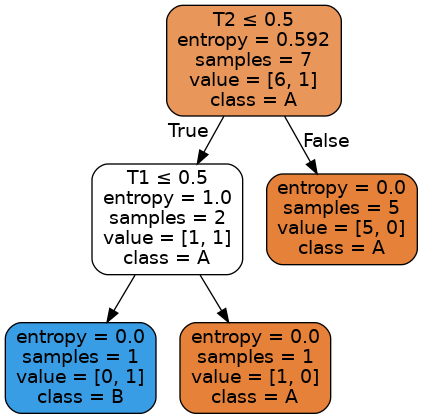

In [70]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
 filled=True, rounded=True,
 special_characters=True,feature_names = feature_cols,class_names=['A','B'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('dataset1.png')
Image(graph.create_png())

**2 - Dataset 2 :**<br>